# Check SOCP and dot vs coeff

## Check SOCP

Check the functions with simple SOCP problems.

In [1]:
import math
import numpy as np
from exputils.Amat.get import get_Amat_sparse
from exputils.state.random_ket import make_random_quantum_state
from exputils.extent.actual import calculate_extent_actual

In [2]:
# 自明ケースでの確認
for method in ["cvx", "mosek", "gurobi"]:
    psi = np.array([2.0, 0.0])
    stabilizer_extent, x = calculate_extent_actual(1, psi, method)[:2]
    print(f"{stabilizer_extent=} {x=}")
    assert np.isclose(stabilizer_extent, 2**2)
    assert np.allclose(x, [2, 0, 0, 0, 0, 0], atol=1e-5)

    psi = np.array([0.0, 2.0])
    stabilizer_extent, x = calculate_extent_actual(1, psi, method)[:2]
    print(f"{stabilizer_extent=} {x=}")
    assert np.isclose(stabilizer_extent, 2**2)
    assert np.allclose(x, [0, 2, 0, 0, 0, 0], atol=1e-5)

    psi = np.array([1 / math.sqrt(2), -1j / math.sqrt(2)])
    stabilizer_extent, x = calculate_extent_actual(1, psi, method)[:2]
    print(f"{stabilizer_extent=} {x=}")
    assert np.isclose(stabilizer_extent, 1**2)
    assert np.allclose(x, [0, 0, 0, 0, 0, 1], atol=1e-5)

# ランダムケースでの確認
for n in [1, 2]:
    print(f"{n=}")
    Amat = get_Amat_sparse(n)
    for seed in range(5):
        np.random.seed(seed)
        psi = np.random.rand(2**n) + 1j * np.random.rand(2**n)
        psi /= np.linalg.norm(psi)
        stabilizer_extent_cvx, x1, y1 = calculate_extent_actual(n, psi, "cvx")
        print(f"{stabilizer_extent_cvx=}")
        stabilizer_extent_mosek, x2, y2 = calculate_extent_actual(n, psi, "mosek")
        print(f"{stabilizer_extent_mosek=}")
        stabilizer_extent_gurobi = calculate_extent_actual(n, psi, "gurobi")[0]
        print(f"{stabilizer_extent_gurobi=}")
        assert np.isclose(stabilizer_extent_cvx, stabilizer_extent_mosek, atol=1e-5)
        assert np.isclose(stabilizer_extent_cvx, stabilizer_extent_gurobi, atol=1e-5)
        assert np.max(np.real(np.abs(y1.conj().T @ Amat))) >= 1 - 1e-5
        assert np.max(np.real(np.abs(y2.conj().T @ Amat))) >= 1 - 1e-5

stabilizer_extent=3.999999984454875 x=array([1.99999998e+00-5.16961663e-25j, 2.93307391e-23+1.16539702e-23j,
       6.34496897e-09+1.48898415e-23j, 6.34496897e-09-3.52093974e-23j,
       6.34496897e-09-1.43332359e-23j, 6.34496897e-09+3.53838860e-23j])
stabilizer_extent=3.9999999844548793 x=array([-6.26189404e-24-3.22686313e-23j,  1.99999998e+00-6.12006132e-25j,
        6.34496898e-09-3.90661988e-23j, -7.76099689e-24-6.34496898e-09j,
       -6.34496898e-09-3.94122116e-23j, -8.28049146e-24+6.34496898e-09j])
stabilizer_extent=0.9999999823516531 x=array([ 9.14141454e-09-8.33254801e-24j, -8.18301895e-25-9.14141455e-09j,
        6.46395621e-09-6.46395622e-09j, -2.09162737e-18+3.85726677e-25j,
        6.46395621e-09+6.46395622e-09j,  9.99999974e-01-1.16107415e-23j])
stabilizer_extent=4.000000000100565 x=array([2.00000000e+00+0.j, 0.00000000e+00+0.j, 9.68911744e-12+0.j,
       9.68911744e-12+0.j, 9.68911744e-12+0.j, 9.68911744e-12+0.j])
stabilizer_extent=4.000000000100563 x=array([ 0.00000000e

## Relation between dot and coeff

It is predicted that dot product is a good indicator for the importance of a stabilizer state in stabilizer extent.
We check this hypothesis by comparing the dot product and the coefficient of the stabilizer state in the stabilizer extent.

  0%|          | 0/36720 [00:00<?, ?it/s]

Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 32              
  Affine conic cons.     : 36720 (110160 rows)
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 110160          
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.05            
Lin. dep.  - primal attempts        : 1                 successes              : 1               
Lin. dep.  - dual attempts          : 0        

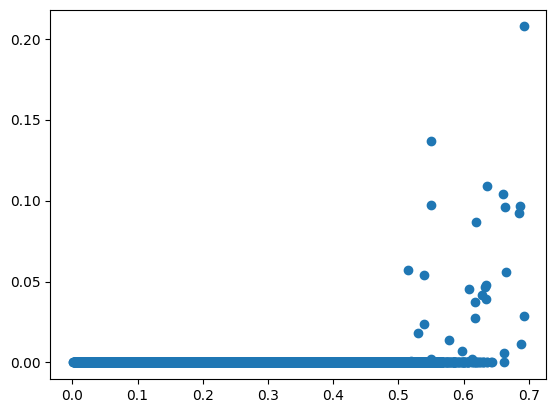

In [5]:
n = 4
psi = make_random_quantum_state("pure", n, seed=0)
Amat = get_Amat_sparse(n)
stabilizer_extent, x, y = calculate_extent_actual(n, psi, "mosek", True)
print(f"{stabilizer_extent=}")
print(f"{x=}")
dots = psi.conj() @ Amat

import matplotlib.pyplot as plt

plt.scatter(np.abs(dots), np.abs(x))
plt.show()

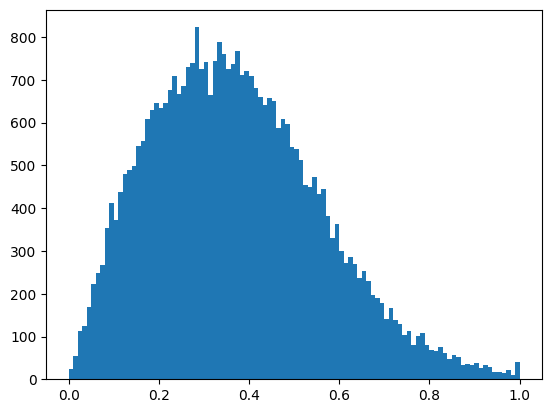

In [7]:
plt.hist(np.abs(y @ Amat), bins=100)
plt.show()